### Importing libraries

In [274]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Exploring the dataset

In [275]:
df = pd.read_csv('capmetro_UT.csv')
df[:5]

,timestamp,boarding,alighting,day_of_week,temperature,hour_of_day,month,weekend
0,2018-09-01 06:00:00,0,1,Sat,74.82,6,Sep,weekend
1,2018-09-01 06:15:00,2,1,Sat,74.82,6,Sep,weekend
2,2018-09-01 06:30:00,3,4,Sat,74.82,6,Sep,weekend
3,2018-09-01 06:45:00,3,4,Sat,74.82,6,Sep,weekend
4,2018-09-01 07:00:00,2,4,Sat,74.39,7,Sep,weekend


In [276]:
df.columns.values

array(['timestamp', 'boarding', 'alighting', 'day_of_week', 'temperature',
       'hour_of_day', 'month', 'weekend'], dtype=object)

In [277]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create 'date' column using the 'timestamp' column
df['date'] = df['timestamp'].dt.date

### Section 1: Relationship between Month, Average Temperature, Boarding and Alighting

#### Monthly Averages for Temperature, Boarding, and Alighting

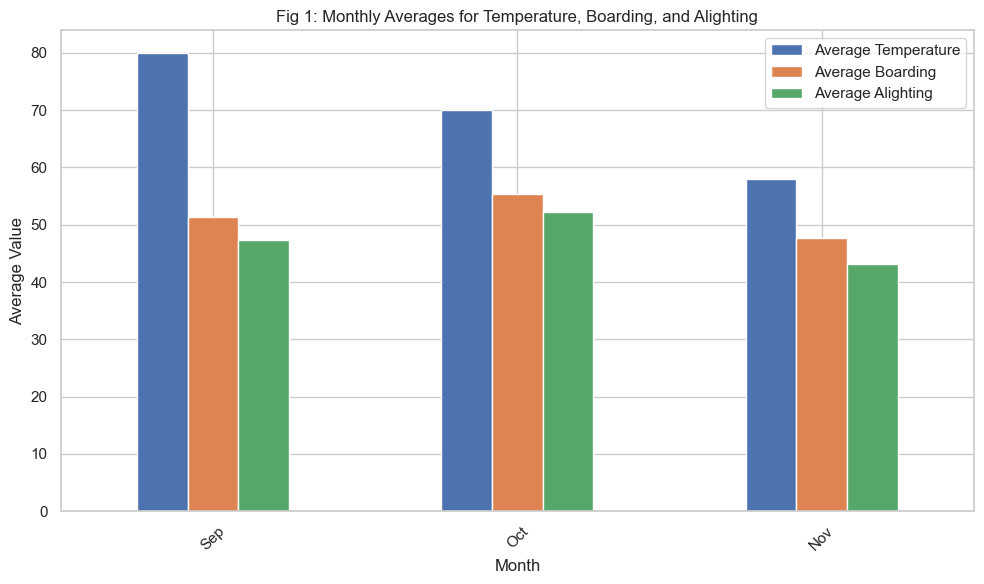

In [278]:
# Group data by month and calculate average temperature, boarding, and alighting
monthly_stats = df.groupby('month')[['temperature', 'boarding', 'alighting']].mean().sort_values(by='temperature', ascending=False)

# Create a bar graph
ax = monthly_stats.plot(kind='bar', figsize=(10, 6))

ax.set_title("Fig 1: Monthly Averages for Temperature, Boarding, and Alighting")
ax.set_xlabel("Month")
ax.set_ylabel("Average Value")
ax.legend(["Average Temperature", "Average Boarding", "Average Alighting"])
ax.set_xticklabels(monthly_stats.index, rotation=45)

plt.tight_layout()
plt.show()

In [279]:
!pip install holidays

#### Monthly Averages for Boarding, and Alighting (Weekends and Weekdays)

/var/folders/vb/mgxj4pwj0vv31200pb1k3czm0000gn/T/ipykernel_83013/3794128759.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_boarding_weekdays = month_data[weekdays_mask]['boarding'].mean()
/var/folders/vb/mgxj4pwj0vv31200pb1k3czm0000gn/T/ipykernel_83013/3794128759.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_boarding_weekends = month_data[weekends_mask]['boarding'].mean()


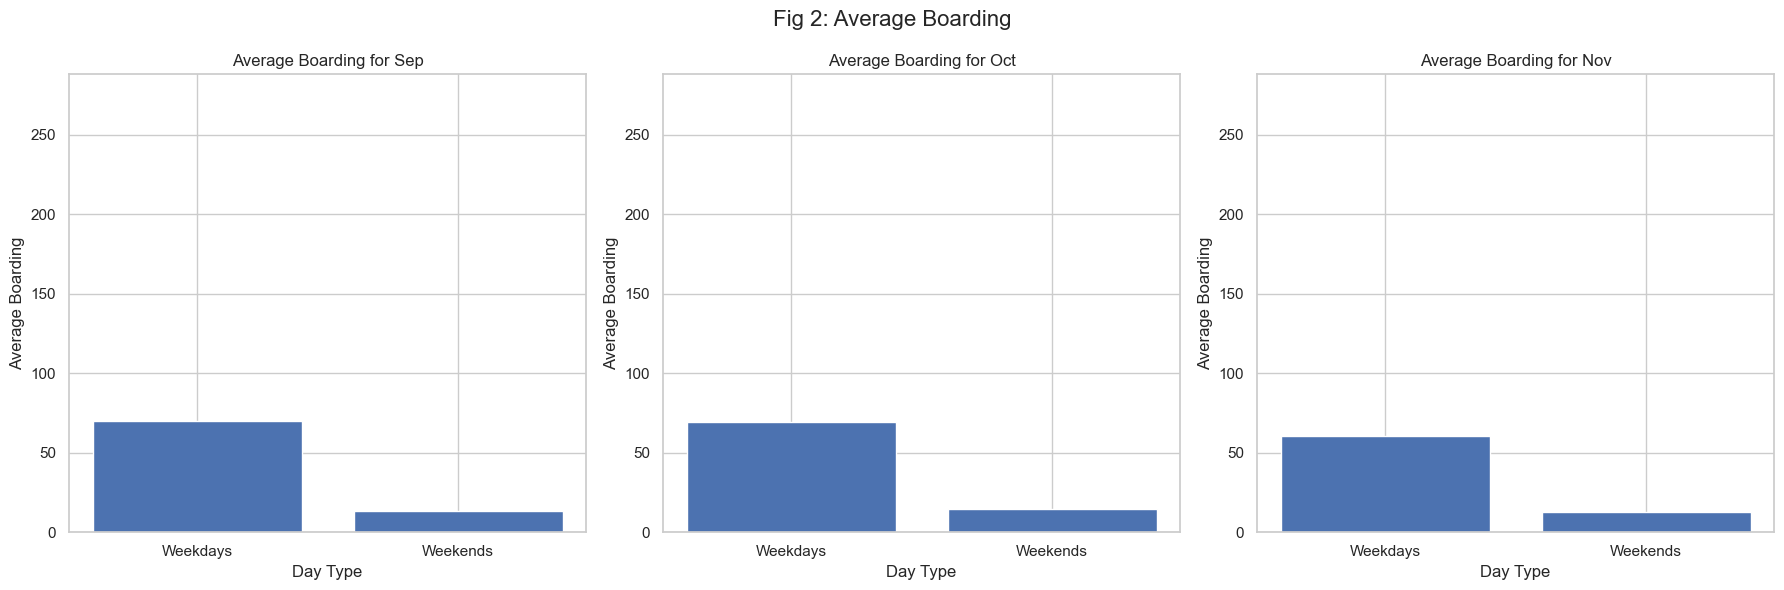

/var/folders/vb/mgxj4pwj0vv31200pb1k3czm0000gn/T/ipykernel_83013/3794128759.py:36: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_alighting_weekdays = month_data[weekdays_mask]['alighting'].mean()
/var/folders/vb/mgxj4pwj0vv31200pb1k3czm0000gn/T/ipykernel_83013/3794128759.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  avg_alighting_weekends = month_data[weekends_mask]['alighting'].mean()


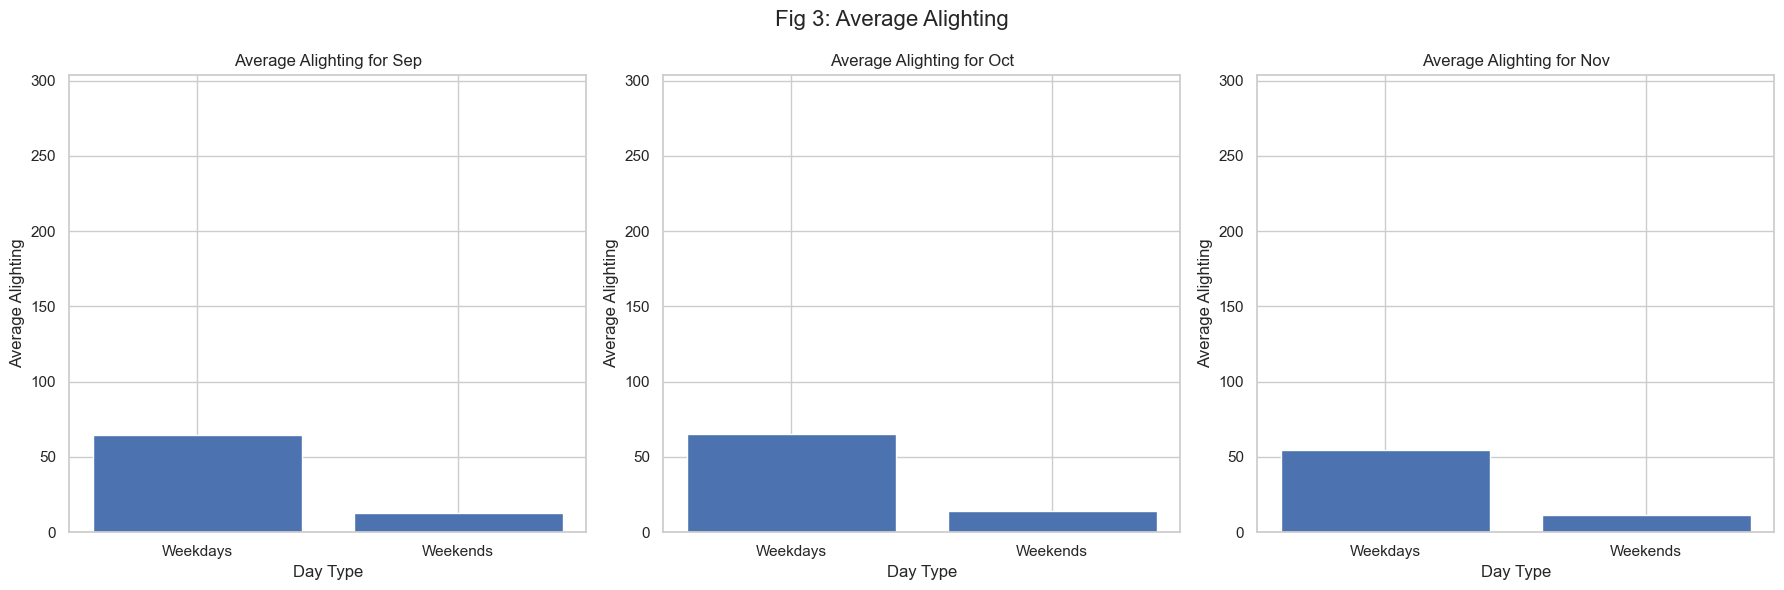

In [280]:
# Create a mask for weekdays and weekends
weekdays_mask = df['weekend'] == 'weekday'
weekends_mask = df['weekend'] == 'weekend'

# Create a 1x3 grid of subplots for average boarding
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
fig.suptitle('Fig 2: Average Boarding', fontsize=16)

months = df['month'].unique()

for i, month in enumerate(months):
    month_data = df[df['month'] == month]
    avg_boarding_weekdays = month_data[weekdays_mask]['boarding'].mean()
    avg_boarding_weekends = month_data[weekends_mask]['boarding'].mean()

    # Create a bar graph for each month
    axes[i].bar(['Weekdays', 'Weekends'], [avg_boarding_weekdays, avg_boarding_weekends])
    axes[i].set_title(f"Average Boarding for {month}")
    axes[i].set_xlabel("Day Type")
    axes[i].set_ylabel("Average Boarding")
    axes[i].set_ylim(0, df['boarding'].max())  # Set y-axis limit to match the data range

plt.tight_layout()
plt.show()

# Create a 1x3 grid of subplots for average alighting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
fig.suptitle('Fig 3: Average Alighting', fontsize=16)

months = df['month'].unique()

for i, month in enumerate(months):
    month_data = df[df['month'] == month]
    avg_alighting_weekdays = month_data[weekdays_mask]['alighting'].mean()
    avg_alighting_weekends = month_data[weekends_mask]['alighting'].mean()

    # Create a bar graph for each month
    axes[i].bar(['Weekdays', 'Weekends'], [avg_alighting_weekdays, avg_alighting_weekends])
    axes[i].set_title(f"Average Alighting for {month}")
    axes[i].set_xlabel("Day Type")
    axes[i].set_ylabel("Average Alighting")
    axes[i].set_ylim(0, df['alighting'].max())  # Set y-axis limit to match the data range

plt.tight_layout()
plt.show()

#### Mean Net Passengers by Date and Checking for Holidays

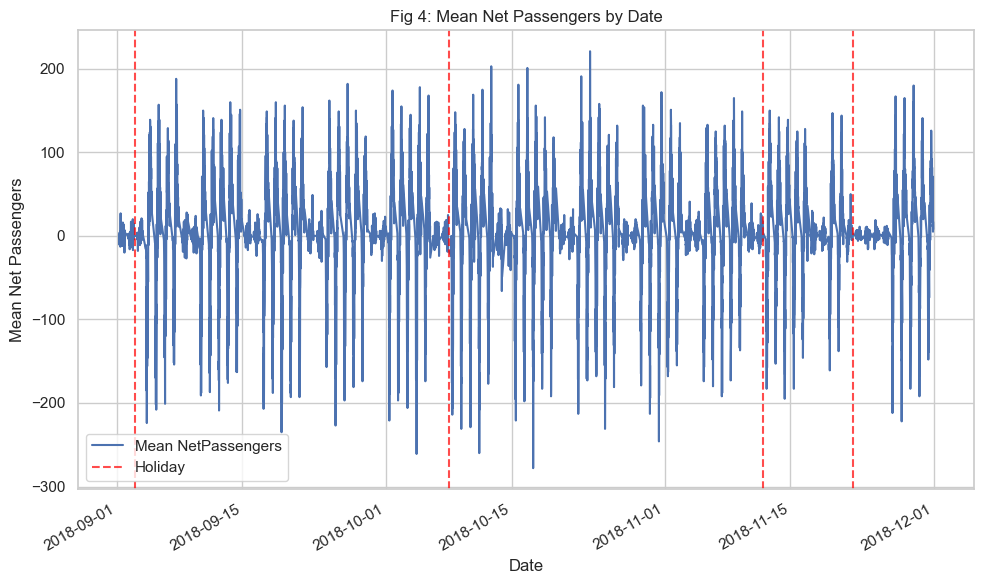

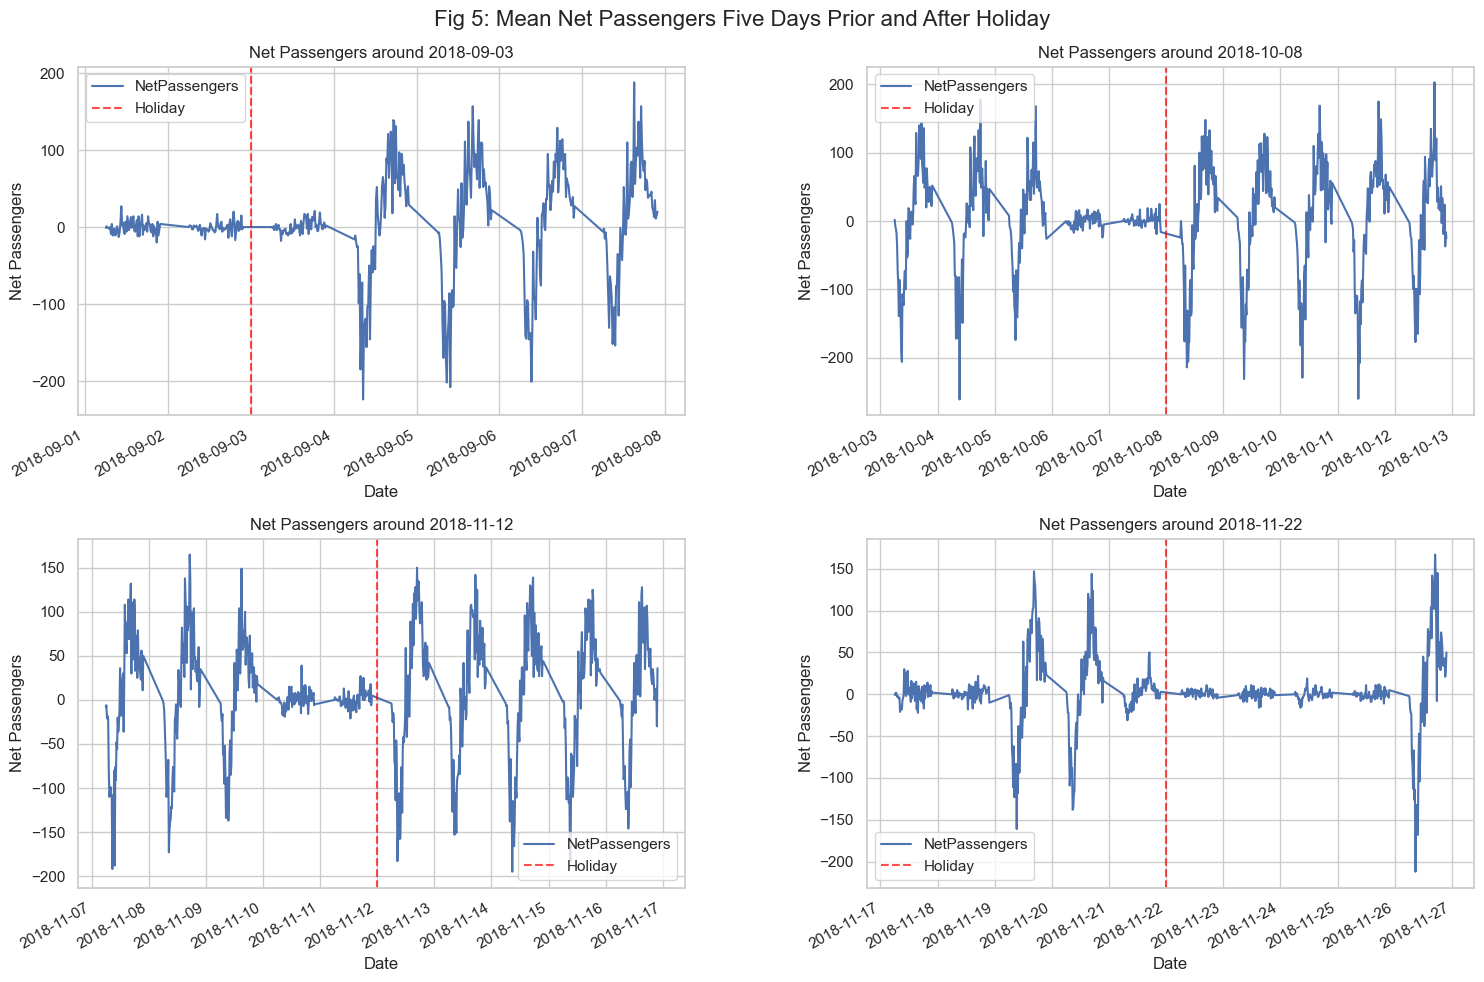

In [281]:
# Calculate NetPassengers
df['NetPassengers'] = df['boarding'] - df['alighting']

# Group by date and calculate mean
df_grouped = df.groupby('timestamp')['NetPassengers'].mean()

# Create the plot
plt.figure(figsize=(10, 6))

# Plot Mean NetPassengers
df_grouped.plot(label='Mean NetPassengers')

# Add vertical lines for holidays
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2018-09-01', end='2018-11-30').to_pydatetime()
for holiday_date in holidays:
    plt.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.7)

# Create custom legend
plt.legend(['Mean NetPassengers', 'Holiday'], loc='best')

plt.xlabel('Date')
plt.ylabel('Mean Net Passengers')
plt.title('Fig 4: Mean Net Passengers by Date')
plt.grid(True)
plt.tight_layout()
plt.show()

# Define the number of columns for subplots
num_columns = 2
num_rows = (len(holidays) + num_columns - 1) // num_columns

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 10))
axes = axes.flatten()
fig.suptitle('Fig 5: Mean Net Passengers Five Days Prior and After Holiday', fontsize=16)

# Create plots for each holiday
for idx, holiday_date in enumerate(holidays):
    # Select data for the specified date range
    start_date = holiday_date - pd.DateOffset(days=5)
    end_date = holiday_date + pd.DateOffset(days=5)
    holiday_data = df_grouped[start_date:end_date]

    # Plot on the current subplot
    ax = axes[idx]
    holiday_data.plot(ax=ax, label='NetPassengers')

    # Highlight the holiday date
    ax.axvline(x=holiday_date, color='red', linestyle='--', alpha=0.7, label='Holiday')

    ax.set_xlabel('Date')
    ax.set_ylabel('Net Passengers')
    ax.set_title(f'Net Passengers around {holiday_date.date()}')
    ax.legend(loc='best')
    ax.grid(True)
    plt.tight_layout()

# Adjust layout and show the plot
plt.subplots_adjust(wspace=0.3)
plt.show()


#### Explanation

Being frequent users of Cap Metro, prior to plotting the graphs, we had made the hypothese that as the average temperature decreases from the month of September to November, less people would board the bus since the weather would get cooler, discouraging them to use the bus. However, in Figure 1, we notice a small increase in the average boarding and alighting in the month of October before they decrease again in the month of November.  

In addition, with Figures 2 and 3, we wanted to see if there was a change in the average boarding and alighting based on the day of the week however, there was no significant change.

While it is difficult to state a reason for the increase in boarding and alighting in the month of October, one of the possible reasons is that there are more Federal Holidays in the month of September and November than in October because of which fewer people take the bus to and from the UT Region overall. This can be observed in Figures 4 and 5 where we can clearly see that the net passengers drop on holidays. 

In conclusion, based on the graphs above, it is safe to say that temperature or month don't have a significant effect on the average boarding and alighting.

### Section 2: Relationship between the Hour of the Day, Day of the Week and the Average Boarding and Alighting

#### Average Boarding for Each Day of The Week

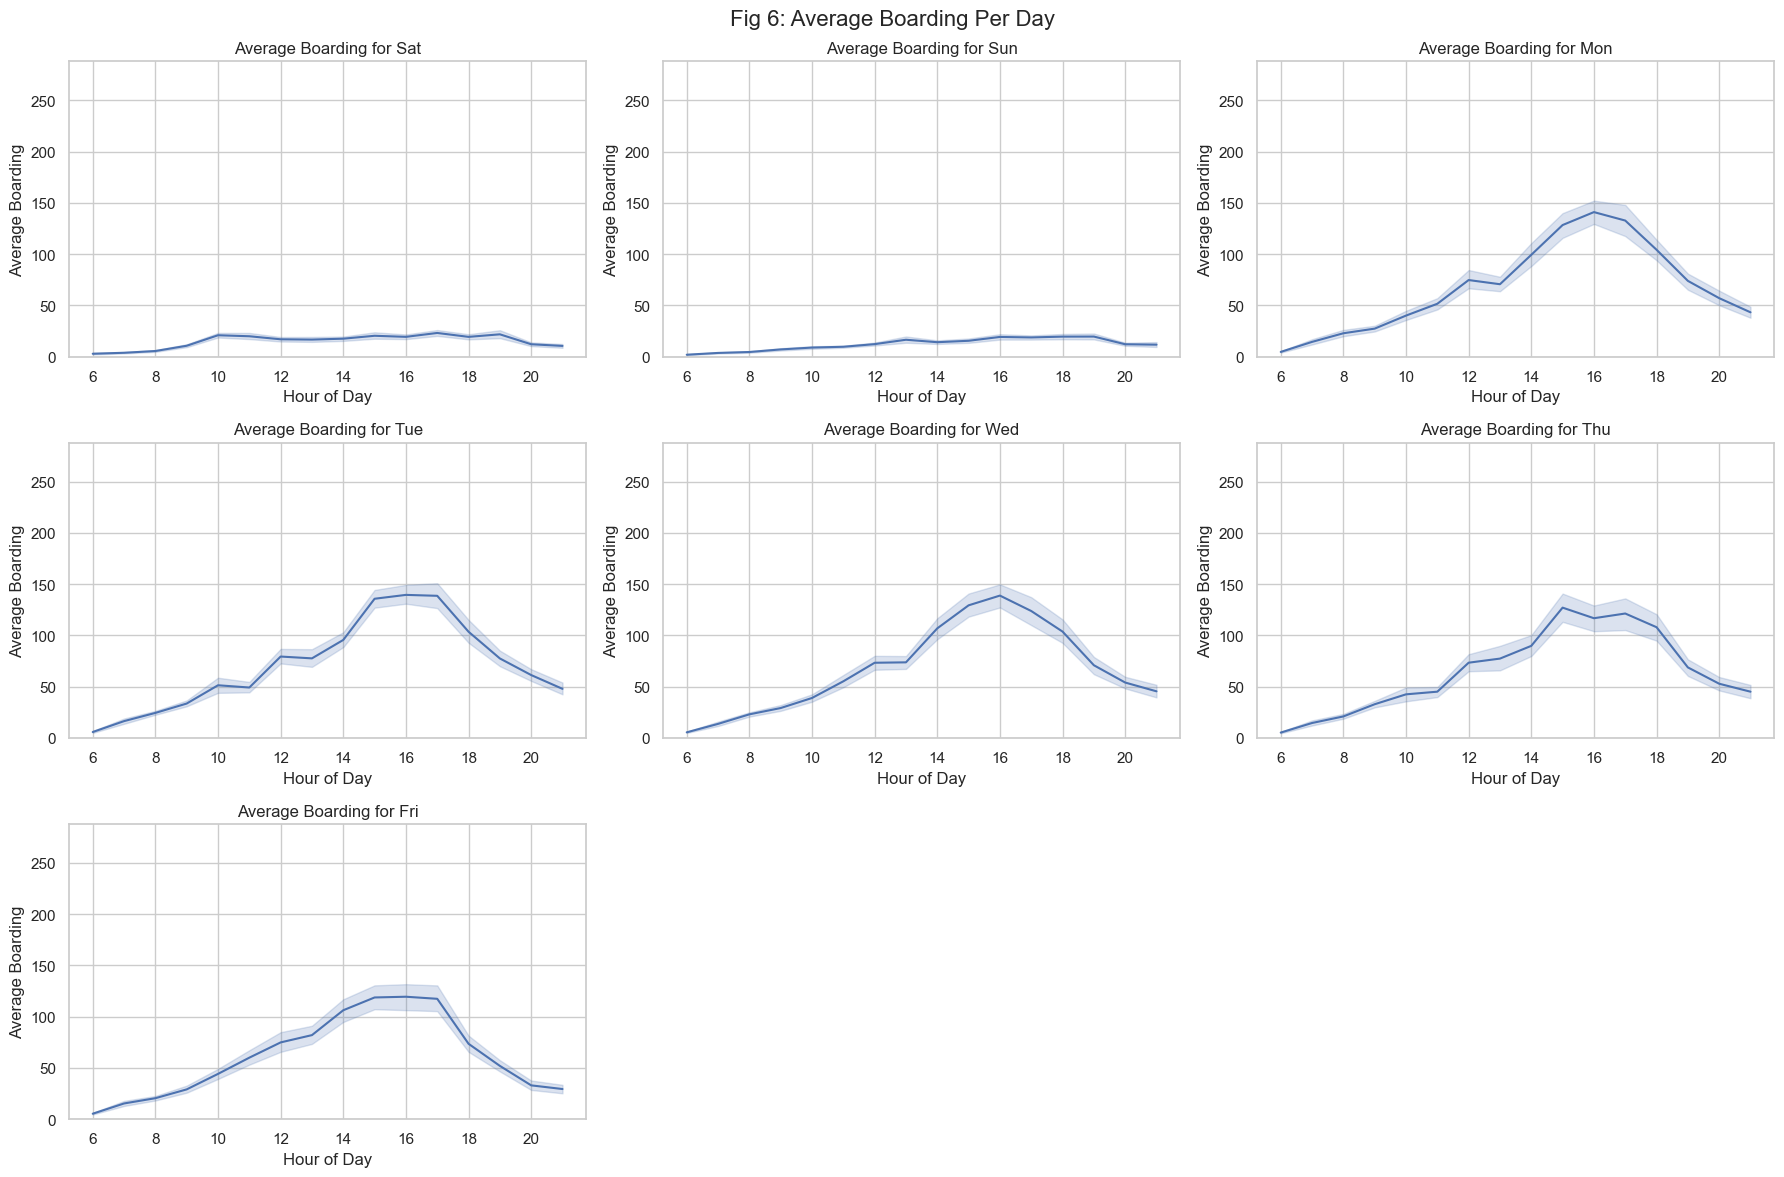

In [282]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('capmetro_UT.csv')

# Create a list of unique days of the week
days_of_week = df['day_of_week'].unique()

# Create a grid of subplots based on the number of days
num_cols = 3
num_rows = (len(days_of_week) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
fig.suptitle('Fig 6: Average Boarding Per Day', fontsize=16)

# Loop through each day of the week and create a line plot
for i, day in enumerate(days_of_week):
    day_data = df[df['day_of_week'] == day]
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.lineplot(x='hour_of_day', y='boarding', data=day_data, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"Average Boarding for {day}")
    axes[row_idx, col_idx].set_xlabel("Hour of Day")
    axes[row_idx, col_idx].set_ylabel("Average Boarding")
    axes[row_idx, col_idx].set_ylim(0, df['boarding'].max())  # Set y-axis limit to match the data range

# Remove any extra empty subplots
for i in range(len(days_of_week), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

#### Average Alighting for Each Day of The Week

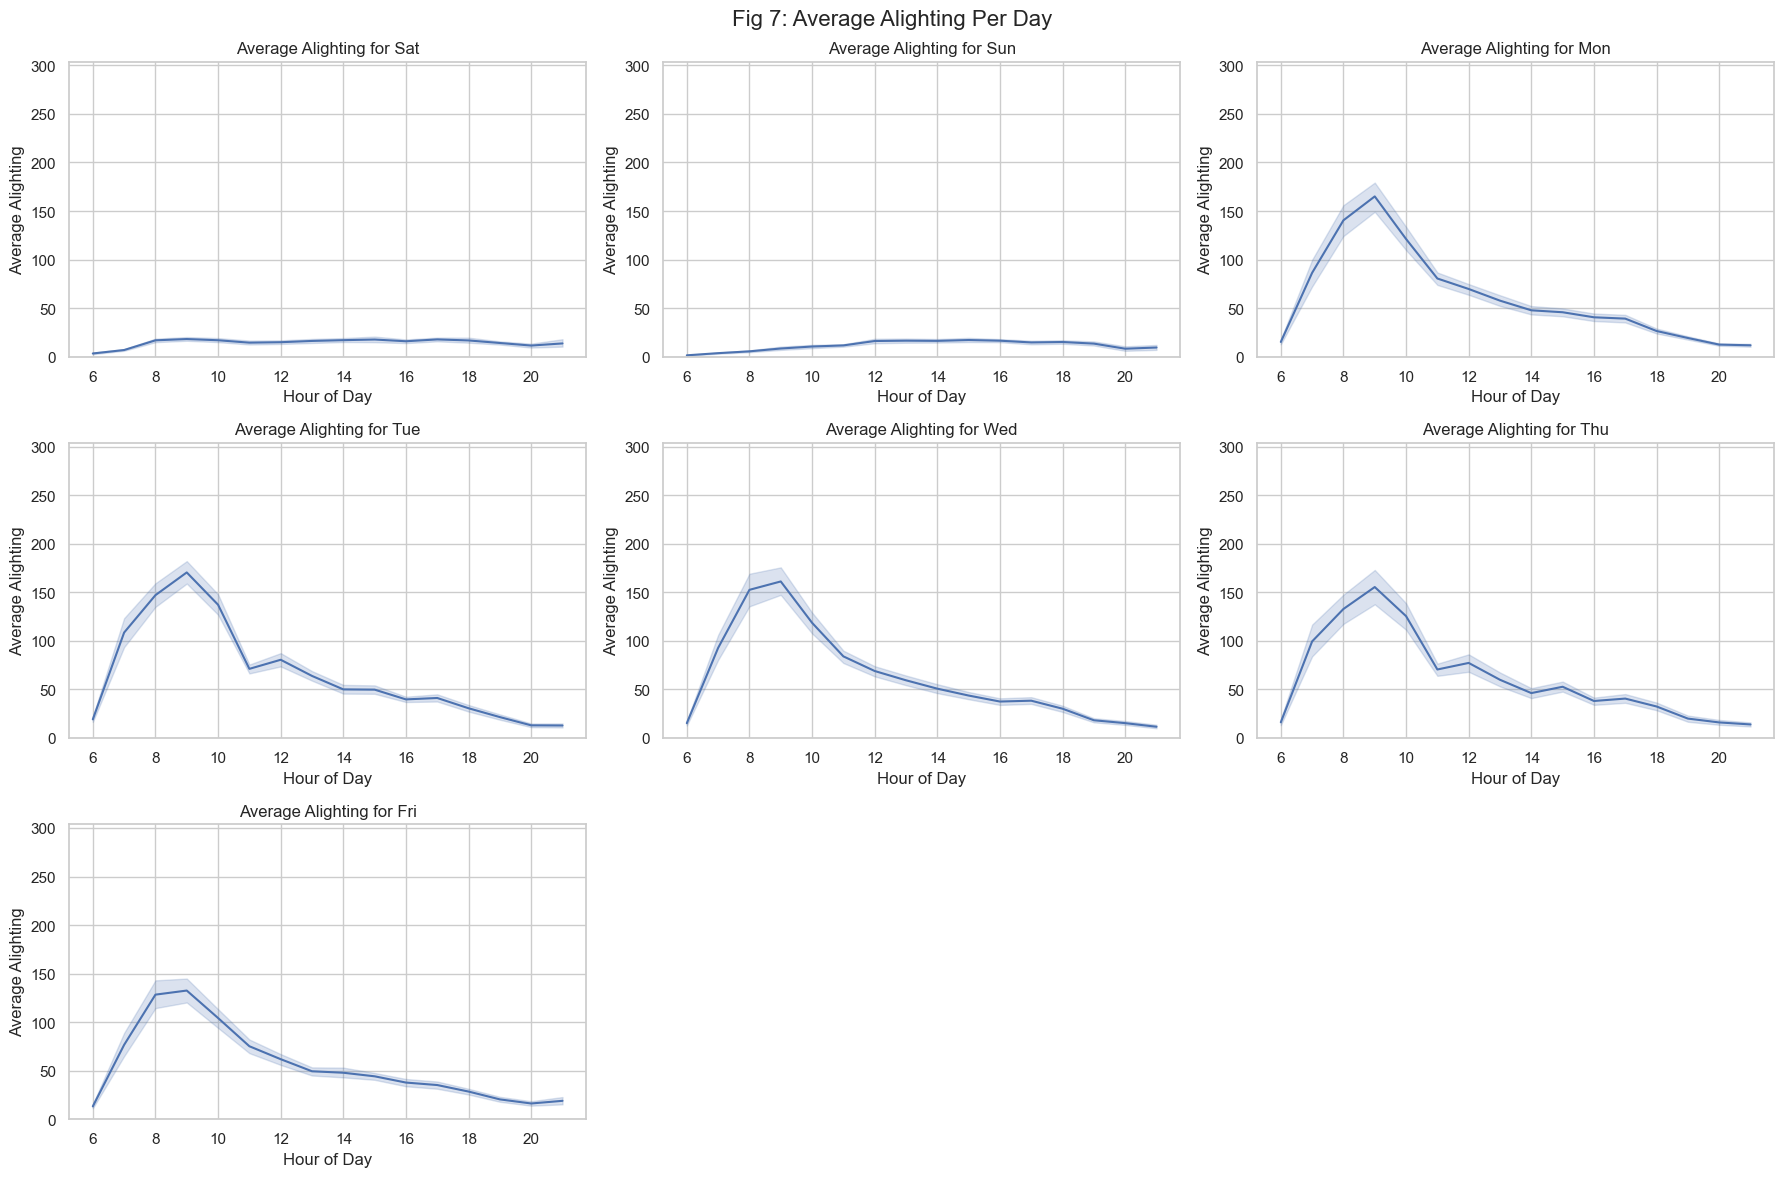

In [283]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('capmetro_UT.csv')

# Create a list of unique days of the week
days_of_week = df['day_of_week'].unique()

# Create a grid of subplots based on the number of days
num_cols = 3
num_rows = (len(days_of_week) + num_cols - 1) // num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 4 * num_rows))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
fig.suptitle('Fig 7: Average Alighting Per Day', fontsize=16)

# Loop through each day of the week and create a line plot
for i, day in enumerate(days_of_week):
    day_data = df[df['day_of_week'] == day]
    row_idx = i // num_cols
    col_idx = i % num_cols
    sns.lineplot(x='hour_of_day', y='alighting', data=day_data, ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f"Average Alighting for {day}")
    axes[row_idx, col_idx].set_xlabel("Hour of Day")
    axes[row_idx, col_idx].set_ylabel("Average Alighting")
    axes[row_idx, col_idx].set_ylim(0, df['alighting'].max())  # Set y-axis limit to match the data range

# Remove any extra empty subplots
for i in range(len(days_of_week), num_rows * num_cols):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()

#### Explanation

For the next section, we are going to observe Figures 6 and 7. As expected, fewer people board and alight the bus on the weekends while on the weekdays, most people alight the bus in the morning between 8AM and 10AM (students arrive to class) and most people board the bus in the afternoon between 3PM and 5PM (students are going back home).